## **Optymalizacja numeryczna I**

**Metody analityczne** - rozwiązanie ma postać <font color='blue'> jawnego wzoru </font>, wynik jest <font color='blue'> dokładny</font>.
<br>
**Metody numeryczne** - rozwiązanie uzyskiwane jest <font color='blue'> w sposób iteracyjny </font> (_metodą kolejnych przybliżeń_), wynik jest <font color='blue'> przybliżony</font>.

Temat optymalizacji podzielony jest na dwie części:

I.   przedstawienie sposobu korzystania z bibliotecznych implementacji metod optymalizacji, (dzisiejsze zajęcia)<br>
II.   objaśnienie zasad działania bibliotecznych algorytmów optymalizacji. (kolejne zajęcia)

Z części I dowiesz się <font color='orange'>**jak tego używać**</font>. <br>
W II części zgłębisz <font color='orange'>**w jaki sposób to działa**</font>, co zwiększy szansę, że we własnych projektach użyjesz tych metod bardziej efektywnie.



---
### **Część I** - <font color='orange'>jak tego używać.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from typing import Tuple

#### **Optymalizacja bez ograniczeń**

Zaczynamy od funkcji jednej zmiennej:
$$F(x) = \cos x - 3\exp\left[-(x-0.2)^2\right]$$


Znając bibliotekę matplotlib wykreślmy wykres ww. funkcji - pomoże nam to w analizie naszych wyników.

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ymher\AppData\Local\Temp\ipykernel_14872\1609650732.py:9: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x_values, y_values, label='$F(x) = \cos(x) - 3\exp[-(x-0.2)^2]$')


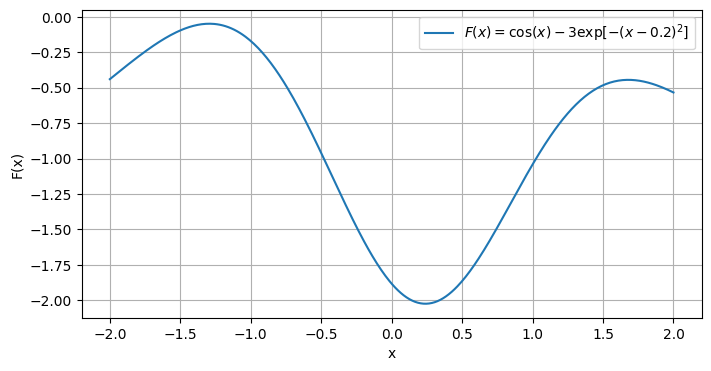

In [9]:
def F(x):
    return np.cos(x) - 3 * np.exp(-(x - 0.2)**2)

x_values = np.linspace(-2, 2, 400)

y_values = F(x_values)

plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values, label='$F(x) = \cos(x) - 3\exp[-(x-0.2)^2]$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()

Znajdźmy minimum funkcji przy uzyciu domyślnych parametrów funkcji `optimize.fmin`. Domyślnie wykorzystywany algorytm to metoda Neldera-Meada.

In [11]:
def Fcelu(x):
  # wykorzystaj tutaj implementację funkcji F(x) użytą do wizualizacji
  return np.cos(x) - 3 * np.exp(-(x - 0.2)**2)

x_pocz = np.random.uniform(-1, 10)
x_opt = optimize.fmin(Fcelu, x_pocz)  # implementacja metody Neldera-Meada
print(x_opt)

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 17
         Function evaluations: 34
[0.2396445]


Wykonaj powyższą komórkę kilkukrotnie - co zauważasz? Czy wybór punktu początkowego ma wpływ na ostateczny wynik?

In [14]:
for _ in range(5):
    x_opt = optimize.fmin(Fcelu, x_pocz)  # implementacja metody Neldera-Meada
    print(x_opt)

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 10
         Function evaluations: 20
[0.23963487]
Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 10
         Function evaluations: 20
[0.23963487]
Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 10
         Function evaluations: 20
[0.23963487]
Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 10
         Function evaluations: 20
[0.23963487]
Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 10
         Function evaluations: 20
[0.23963487]


A jeżeli trzeba znaleźć maksimum?
$$ \arg\max F(x) = \arg\min-F(x)$$

In [18]:
def neg_Fcelu(x):
  return -Fcelu(x)

x_pocz = np.random.uniform(-1,4)
x_opt = optimize.fmin(neg_Fcelu, x_pocz)
print(x_opt)

Optimization terminated successfully.
         Current function value: 0.444603
         Iterations: 16
         Function evaluations: 32
[1.67970058]


**Ćwiczenie 1:** wykreśl funkcję F(x), a następnie znajdź jej maksimum:
$$F(x) = \sin x + 1.5\exp\left[-x^2\right]$$


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ymher\AppData\Local\Temp\ipykernel_14872\1048695431.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_values, y_values, label='$F_1(x) = \sin(x) + 1.5\exp[-x^2]$')


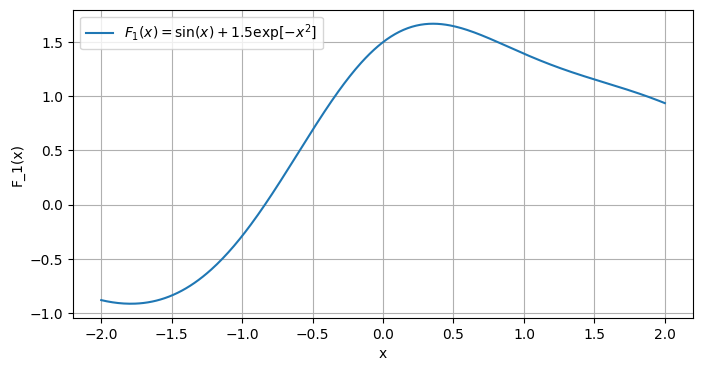

Optimization terminated successfully.
         Current function value: -1.669980
         Iterations: 17
         Function evaluations: 34
[0.35446871]


In [26]:
def F_1(x):
    return np.sin(x) + 1.5 * np.exp(-x**2)

def neg_F_1(x):
    return -F_1(x)

x_values = np.linspace(-2, 2, 400)

y_values = F_1(x_values)

plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values, label='$F_1(x) = \sin(x) + 1.5\exp[-x^2]$')
plt.xlabel('x')
plt.ylabel('F_1(x)')
plt.grid(True)
plt.legend()
plt.show()

x_pocz = np.random.uniform(-1,4)
x_opt = optimize.fmin(neg_F_1, x_pocz)
print(x_opt)

Obsługa funkcji wielowymiarowych, czyli takich, dla których $\mathbf{x} \in \Re^N$ jest analogiczna. <br>
Zaczynamy od funkcji, której minimum jest oczywiste:
$$F(x)=(x_1−2)^2+(x_2+1)^2, \quad \text{ gdzie } \mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \end{array} \right].$$

Argument ```x``` jako tabela równoważna wektorowi $\mathbf{x}$.

In [27]:
def Fcelu(x):
  return (x[0]-2)**2 + (x[1]+1)**2

Fcelu([3,-0.5])

1.25

Problem: współrzędnej $x_i$ odpowiada indeks ```x[i-1]```, przez co łatwo o zamieszanie.
Lepiej zrobić to tak: 

In [28]:
def Fcelu(x):
  x1, x2 = x       # tak zwane rozpakowanie krotki
  return (x1-2)**2 + (x2+1)**2

Zwróć uwagę, że rozwiązanie początkowe musi być teraz dwuwymiarowe.

In [29]:
x_pocz = np.random.normal(loc=0, scale=0.1, size=2)
x_opt = optimize.fmin(Fcelu, x_pocz, disp=False)   # tym razem wyłączam raport optymalizatora
print(f'Optimum jest w punkcie {x_opt}.\nWartość funkcji celu w optimum to {Fcelu(x_opt):f}')

Optimum jest w punkcie [ 2.00001471 -1.00001434].
Wartość funkcji celu w optimum to 0.000000


**ćwiczenie 2:** Wypróbuj w działaniu bardziej zaawansowane matematycznie procedury np.: 
* [`fmin_powell`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_powell.html),
* [`fmin_cg`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html),
* [`fmin_bfgs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html).

Pomimo znacznie większego ładunku teoretycznego, stosuje się je identycznie jak procedurę `fmin`. 

Procedura [`minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) opakowuje różne procedury minimalizacji funkcji jednej zmiennej, pełniąc dla nich rolę interfejsu programisty. Procedura zwraca słownik zawierający najważniejsze informacje o rezultacie procesu optymalizacji. Pod kluczem `x` znajduje się rozwiązanie.

In [ ]:
optimize.minimize(Fcelu, x0=x_pocz, method='L-BFGS-B')

**Ćwiczenie 3**: Wykonaj optymalizację metodami z ćwiczenia drugiego wykorzystując do tego interfejs `optimize.minimize`. Przyjrzyj się temu jakie dane zawiera wynik `optimize.minimize` (z czego składa się obiekt `OptimizeResult`).

W trudnych sytuacjach tonący brzytwy się chwyta, a w dziedzinie optymalizacji brzytwą jest metoda przeglądu zupełnego (ang. *brute force*, *grid search*).<br>
Należy określić z góry kostkę w $N$-wymiarowej przestrzeni rozwiązań, która będzie brutalnie przeszukiwana.

In [ ]:
optimize.brute(Fcelu, (slice(-2, 2, 0.1), slice(1, 6, 0.1)))

### **Optymalizacja z ograniczeniami**


Najłatwiej obsłużyć ograniczenia w postaci prostych **przedziałów dozwolonych wartości**, które wycinają z przestrzeni rozwiązań $N$-wymiarową kostkę.

Funkcja celu: 
$$F(\mathbf{x}) = (x_1-1)^2 + (x_2+2)^2 + x_1x_2$$
Ograniczenia: 
$$3.5 \leq x_1 \leq 6$$
$$-5 \leq x_2 \leq -2$$

In [ ]:
def Fcelu(x):
    x1, x2 = x
    return (x1-1)**2 + (x2+2)**2 +x1*x2

ograniczenia = {'x1': (3.5, 6), 'x2': (-5,-2)}
x_pocz = (
    np.random.uniform(*ograniczenia['x1']),
    np.random.uniform(*ograniczenia['x2'])
)

x_opt = optimize.minimize(
    Fcelu, x_pocz, method='TNC', bounds=list(ograniczenia.values())
).x
print(x_opt)

**Ograniczenia jako funkcje** $g$ <br>

Dla tej samej funkcji celu, co wcześniej wymieniamy ograniczenie na:<br>
$g(\mathbf{x}) = x_2 + 2 + 2(x_1-3)^2 - (x_1 - 3)^4 \geq 0$. <br>
Zwróć uwagę, że w optymalizatorze obowiązuje konwencja $g(x) \geq 0$, odwrotna niż na wykładzie.

In [ ]:
def g(x):
    x1, x2 = x
    return x2 + 2 + 2*(x1-3)**2 - (x1-3)**4

ograniczenia = {'type': 'ineq', 'fun': g}
x_pocz = np.random.uniform(-5,5, size=2)

x_opt = optimize.minimize(
    Fcelu, x_pocz, method='SLSQP', constraints=ograniczenia
).x
print(x_opt)

Wypróbujmy inny optymalizator: [```fmin_cobyla```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cobyla.html).<br>
Funkcja celu:  
$F(\mathbf{x}) = x_1 x_2$  
Ograniczenia:  
$x_1^2 + x_2^2 \leq 1$  
$x_2 \geq 0$ <br>
Zauważ, że procedura zakłada ograniczenia nierównościowe w postaci $g(\mathbf{x}) > 0$, odwrotnie niż na naszych zajęciach.

In [ ]:
def Fcelu(x):
    x1, x2 = x
    return x1*x2

def g1(x):
    x1, x2 = x
    return 1 - (x1**2 + x2**2)

def g2(x):
    x1, x2 = x
    return x2

x_pocz = np.random.uniform(0, 1, size=2)
x_opt = optimize.fmin_cobyla(Fcelu, x_pocz, cons=[g1, g2])

print(f'Minimum: {x_opt}')
print(f'g1: {g1(x_opt):f}')
print(f'g2: {g2(x_opt):f}')

**Ćwiczenie 4:** Wykorzystaj optymalizator `fmin_cobyla`:

Funkcja celu:
$F(\mathbf{x}) = 2x_1 x_2 x_3$

Ograniczenia:  
$2x_1^2 + x_2^2 - x_3^3 \leq 3$  
$3\geq  x_2 \geq 0$ <br>
$x_3 \geq 1$ <br>

**Ograniczenia równościowe**: $\quad g(\mathbf{x})=0$ <br>
Funkcja celu: 
$$F(\mathbf{x}) = -x_1^2 - x_2^2 - x_3^2$$ 
Ograniczenia: 
$$x_1 = x_3$$
$$x_3 = x_1 + x_2 - 5$$

In [ ]:
def Fcelu(x):
    x1, x2, x3 = x
    return ...

def g1(x):
    x1, x2, x3 = x
    return x1 - x3

def g2(x):
    x1, x2, x3 = x
    return ...

ograniczenia = ({'type': 'eq', 'fun': g1}, {'type': 'eq', 'fun': g2})
x_pocz = np.random.uniform(0, 1, size=3)

x_opt = optimize.minimize(
    Fcelu, x_pocz, method='SLSQP', constraints=ograniczenia
).x
print(x_opt)

W celu rozwiązania zadań __programowania liniowego__ (i ogólnie zadań _programowania_ w optymalizacji) odsyłam zainteresowane osoby do metod dedykowanych:
* [```linprog```](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linprog.html),
* [cvxopt](https://cvxopt.org/) (biblioteka zewnętrzna),
* [PuLP](https://coin-or.github.io/pulp/main/installing_pulp_at_home.html)

Warto spojrzeć również do dokumentacji [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) oraz ksiązki internetowej [Scipy Lecture Notes](https://scipy-lectures.org/).

**Coś więcej** niż sugestia:<br>
Potrafisz już rozwiązać numerycznie zadania optymalizacji, które na ćwiczeniach rozwiązywane były analitycznie.